In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/pre-cog/keys/cases_court_key.csv
/kaggle/input/pre-cog/keys/judge_case_merge_key.csv


In [9]:
case_2018 = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2018.csv')
print(case_2018.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012018  2018           1          1         1   
1  01-01-01-201900000022018  2018           1          1         1   
2  01-01-01-201900000032018  2018           1          1         1   
3  01-01-01-201900000042018  2018           1          1         1   
4  01-01-01-201900000052018  2018           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000022018  chief judicial magistrate           0 male   
1  MHNB030000032018  chief judicial magistrate           0 male   
2  MHNB030000042018  chief judicial magistrate           0 male   
3  MHNB030000052018  chief judicial magistrate           0 male   
4  MHNB030000062018  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 m

In [10]:
case_2018_a = case_2018.drop(case_2018.iloc[:, 3:7],
                       axis = 1)
print(case_2018_a.head())

                ddl_case_id  year  state_code female_defendant  \
0  01-01-01-201900000012018  2018           1           0 male   
1  01-01-01-201900000022018  2018           1           0 male   
2  01-01-01-201900000032018  2018           1           0 male   
3  01-01-01-201900000042018  2018           1           0 male   
4  01-01-01-201900000052018  2018           1    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 male           -9999               0       1943        3315.0   
2            0 male           -9999               0       1943        5877.0   
3            0 male           -9999               0       1943         840.0   
4            0 male           -9999               1       1943         840.0   

   disp_name date_of_filing date_of_decision date_first_list date_last_list  \
0         33     2018-01-01       2018-02-0

In [11]:
case_2018_b = case_2018_a.drop(case_2018_a.iloc[:, 10:15],
                       axis = 1)
print(case_2018_b.head())

                ddl_case_id  year  state_code female_defendant  \
0  01-01-01-201900000012018  2018           1           0 male   
1  01-01-01-201900000022018  2018           1           0 male   
2  01-01-01-201900000032018  2018           1           0 male   
3  01-01-01-201900000042018  2018           1           0 male   
4  01-01-01-201900000052018  2018           1    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 male           -9999               0       1943        3315.0   
2            0 male           -9999               0       1943        5877.0   
3            0 male           -9999               0       1943         840.0   
4            0 male           -9999               1       1943         840.0   

   disp_name  
0         33  
1         52  
2         52  
3         52  
4          5  


In [12]:
type_name = pd.read_csv('/kaggle/input/pre-cog/keys/type_name_key.csv')
print(type_name.head())

   year  type_name         type_name_s  count
0  2010        1.0            (m) t.s.     18
1  2010        2.0                (sc)      2
2  2010        3.0          ..mact 166     97
3  2010        4.0  04 complaint cases     19
4  2010        5.0    04 criminal case     21


In [13]:
type_name.drop(type_name[type_name['year'] != 2018].index, inplace = True)

In [14]:
print(type_name.head())

       year  type_name            type_name_s  count
55181  2018        1.0               (m) t.s.    167
55182  2018        2.0  (mac) money execution      5
55183  2018        3.0               0.s.(la)      1
55184  2018        4.0    01 bail_application    355
55185  2018        5.0     01 criminal appeal     14


In [15]:
type_name.reset_index()

,index,year,type_name,type_name_s,count
0,55181,2018,1.0,(m) t.s.,167
1,55182,2018,2.0,(mac) money execution,5
2,55183,2018,3.0,0.s.(la),1
3,55184,2018,4.0,01 bail_application,355
4,55185,2018,5.0,01 criminal appeal,14
...,...,...,...,...,...
7528,62709,2018,7529.0,xxxxxspl t.ndps,3
7529,62710,2018,7530.0,zila panchayat act,217
7530,62711,2018,7531.0,zilla panchayat act,17
7531,62712,2018,7532.0,zima 457 cr.p.c.,9


In [16]:
type_name = type_name[(type_name['type_name_s'] == "divo cases") | (type_name['type_name_s'] == "divorce") | (type_name['type_name_s'] == "divorce case") | (type_name['type_name_s'] == "divorce on mutual consent") | (type_name['type_name_s'] == "divorce suit") | (type_name['type_name_s'] == "dmc") | (type_name['type_name_s'] == "dom viol") | (type_name['type_name_s'] == "domestic violence") | (type_name['type_name_s'] == "domestic violence ac") | (type_name['type_name_s'] == "domestic violence act 2005") | (type_name['type_name_s'] == "domestic violence act.") | (type_name['type_name_s'] == "domestic violence cases") | (type_name['type_name_s'] == "domestic voilenceact") | (type_name['type_name_s'] == "domestice violence act") | (type_name['type_name_s'] == "dop") | (type_name['type_name_s'] == "dowry prohibition act")]

In [17]:
print(type_name)

       year  type_name                 type_name_s  count
57606  2018     2426.0                  divo cases    165
57607  2018     2427.0                     divorce    334
57608  2018     2428.0                divorce case    395
57610  2018     2430.0   divorce on mutual consent   1710
57612  2018     2432.0                divorce suit     24
57614  2018     2434.0                         dmc  13122
57617  2018     2437.0                    dom viol      1
57622  2018     2442.0           domestic violence   1004
57624  2018     2444.0        domestic violence ac    161
57626  2018     2446.0  domestic violence act 2005   1883
57629  2018     2449.0      domestic violence act.   1483
57631  2018     2451.0     domestic violence cases    369
57633  2018     2453.0        domestic voilenceact    334
57634  2018     2454.0      domestice violence act    899
57636  2018     2456.0                         dop    720
57639  2018     2459.0       dowry prohibition act     89


In [18]:
type_name = type_name.drop(['year'], axis=1)

In [19]:
mer_2018 = case_2018_b.merge(type_name, left_on="type_name", right_on="type_name", how="left")
print(mer_2018.head())

                ddl_case_id  year  state_code female_defendant  \
0  01-01-01-201900000012018  2018           1           0 male   
1  01-01-01-201900000022018  2018           1           0 male   
2  01-01-01-201900000032018  2018           1           0 male   
3  01-01-01-201900000042018  2018           1           0 male   
4  01-01-01-201900000052018  2018           1    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 male           -9999               0       1943        3315.0   
2            0 male           -9999               0       1943        5877.0   
3            0 male           -9999               0       1943         840.0   
4            0 male           -9999               1       1943         840.0   

   disp_name type_name_s  count  
0         33         NaN    NaN  
1         52         NaN    NaN  
2         52        

In [20]:
mer_2018.dropna(subset=['type_name_s'], inplace=True)
print(mer_2018.head())

                     ddl_case_id  year  state_code female_defendant  \
678488  01-23-02-201300000012018  2018           1           0 male   
678489  01-23-02-201300000022018  2018           1           0 male   
678490  01-23-02-201300000032018  2018           1           0 male   
678491  01-23-02-201300000042018  2018           1           0 male   
678492  01-23-02-201300000052018  2018           1           0 male   

       female_petitioner  female_adv_def  female_adv_pet  type_name  \
678488          1 female           -9999           -9999       2451   
678489     -9998 unclear           -9999           -9999       2451   
678490          1 female           -9999           -9999       2451   
678491            0 male           -9999           -9999       2451   
678492     -9998 unclear           -9999           -9999       2451   

        purpose_name  disp_name              type_name_s  count  
678488        3799.0         23  domestic violence cases  369.0  
678489        

In [21]:
disp = pd.read_csv('/kaggle/input/pre-cog/keys/disp_name_key.csv')
print(disp.head())

   year  disp_name disp_name_s   count
0  2010          1    258 crpc   15765
1  2010          2      abated   22021
2  2010          3   absconded   16773
3  2010          4   acquitted  406015
4  2010          5     allowed  244023


In [22]:
disp.drop(disp[disp['year'] != 2018].index, inplace = True)

In [23]:
print(disp.head())

     year  disp_name disp_name_s    count
410  2018          1    258 crpc    14443
411  2018          2      abated    15656
412  2018          3   absconded     2976
413  2018          4   acquitted   207801
414  2018          5     allowed  1104047


In [24]:
mdisp = mer_2018.merge(disp, left_on="disp_name", right_on="disp_name", how="left")
print(mdisp.head())

                ddl_case_id  year_x  state_code female_defendant  \
0  01-23-02-201300000012018    2018           1           0 male   
1  01-23-02-201300000022018    2018           1           0 male   
2  01-23-02-201300000032018    2018           1           0 male   
3  01-23-02-201300000042018    2018           1           0 male   
4  01-23-02-201300000052018    2018           1           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0          1 female           -9999           -9999       2451        3799.0   
1     -9998 unclear           -9999           -9999       2451        1898.0   
2          1 female           -9999           -9999       2451        2811.0   
3            0 male           -9999           -9999       2451        2811.0   
4     -9998 unclear           -9999           -9999       2451        2811.0   

   disp_name              type_name_s  count_x  year_y  \
0         23  domestic violence cases    369.0    20

In [25]:
m_final = mdisp.groupby(['disp_name_s'])['ddl_case_id'].count().reset_index()

In [26]:
print(m_final)

                disp_name_s  ddl_case_id
0                    abated            1
1                 acquitted           12
2                   allowed         3364
3                     award            2
4                    closed            1
5                compounded            2
6                compromise          589
7                confession            3
8           contest-allowed          180
9                   decided           22
10                dismissed         1471
11                 disposed          721
12       disposed-otherwise          203
13  disposition var missing        12329
14                 ex-parte           20
15                judgement            4
16                not press            9
17                    other          570
18                otherwise           17
19           partly decreed            1
20               procedural            7
21   referred to lok adalat           31
22                   reject            7
23              

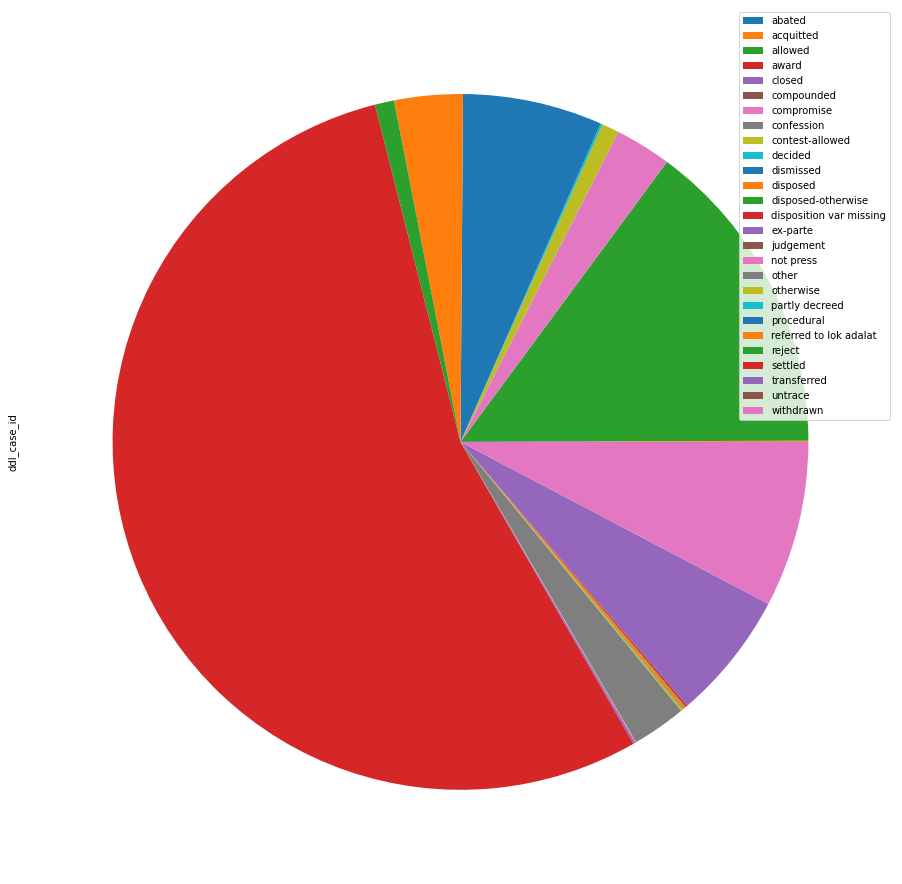

In [43]:
m_final.groupby(['disp_name_s']).sum().plot(kind='pie', y = "ddl_case_id", figsize=(16,16), labeldistance=None)
plt.pyplot.savefig('outcome_2018.png')